In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp


In [281]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [282]:
df = pd.read_csv("/content/drive/MyDrive/CSR/Python/Laptop/laptop_price.csv", encoding = 'latin')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


**DATA CLEANING**



In [284]:
#dropna
#drop
df.drop(columns = ['laptop_ID','Product'],inplace=True)

In [285]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [286]:
df.duplicated().sum()

29

In [287]:
df.drop_duplicates(inplace=True)

In [288]:
df.shape

(1274, 11)

In [289]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4GB,500GB HDD,Intel HD Graphics 500,Windows 10,2.1kg,333.0
625,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.2kg,899.0
170,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,1349.0


In [290]:
# 88.91 INR >> 1 euro
# 299.0 * 89.07 = INR

In [291]:
df["Price_euros"] = round(df["Price_euros"] * 88.91).astype('int')

In [292]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119112
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,79925
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51123
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,225605
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160358


In [293]:
df.rename(columns = {"Price_euros" : 'Price'},inplace = True)

In [294]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119112
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,79925
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51123
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,225605
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160358


In [295]:
#Ram column converting from obj col to numeric col
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [296]:
a = '4GB'
type(a)

str

In [297]:
a.replace("GB", "")

'4'

In [298]:
#Str formatting
df['Ram'] = df['Ram'].apply(lambda a: a.replace("GB" , "")).astype("int")

In [299]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119112
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,79925
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51123
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,225605
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160358


In [300]:
#EDA
df['Ram'].value_counts()

,count
Ram,
8,613
4,366
16,198
6,35
12,25
32,17
2,16
24,3
64,1


<Axes: xlabel='Ram', ylabel='Price'>

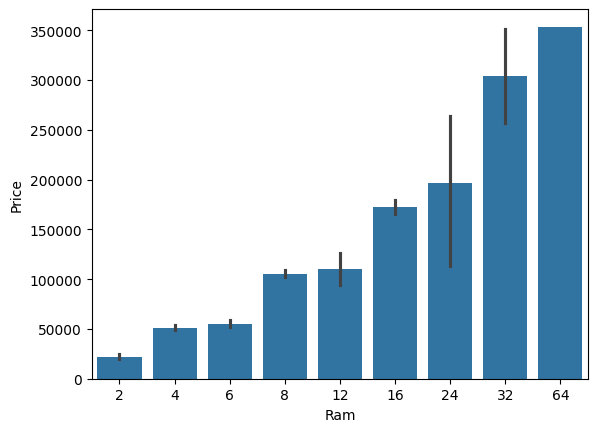

In [301]:
sns.barplot(x = df['Ram'], y =df['Price'])

The graph illustrates a significant upward trend in laptop prices as RAM capacity increases. This trend suggests that RAM is a key factor influencing the cost of laptops, with higher RAM configurations commanding a substantial price premium.

In [302]:
df['Weight'] = df['Weight'].apply(lambda a : a.replace("kg" ,"")).astype(float)

In [303]:
df['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


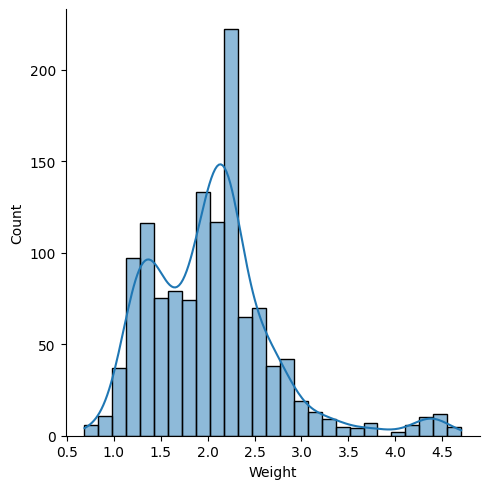

In [304]:
sns.displot(x= df['Weight'], kde = True)

The histogram reveals a right-skewed distribution of weights, with a majority of data points concentrated between 1 and 2.5, and a tail extending towards higher values.

<Axes: xlabel='Weight', ylabel='Price'>

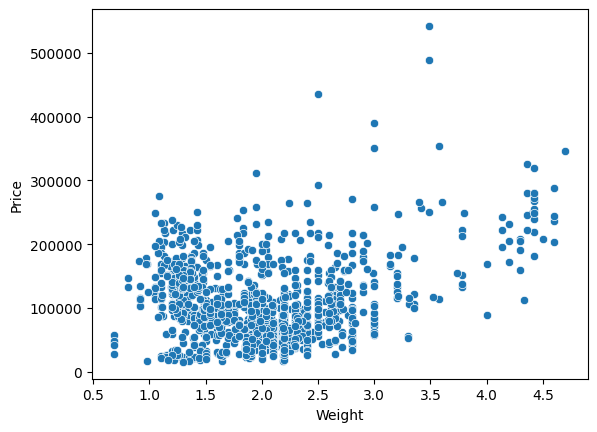

In [305]:
sns.scatterplot(x= df['Weight'], y = df['Price'])

The scatter plot shows a moderate positive relationship between laptop weight and price. While there is some variability, the overall trend indicates that as laptop weight increases, the price tends to increase as well.

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


In [307]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
755,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6260U 1.8GHz,8,256GB SSD,Intel HD Graphics 540,Windows 10,1.3,106603


In [308]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [309]:
df.shape #before dropping companies

(1274, 11)

In [310]:
#Filtering for the companies which has repeated more than 10 times in the dataset
df = df[df.groupby('Company')['Company'].transform('count') > 10]

In [311]:
df["Company"].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


In [312]:
df.shape #after droppping companies

(1223, 11)

<Axes: xlabel='Company', ylabel='Price'>

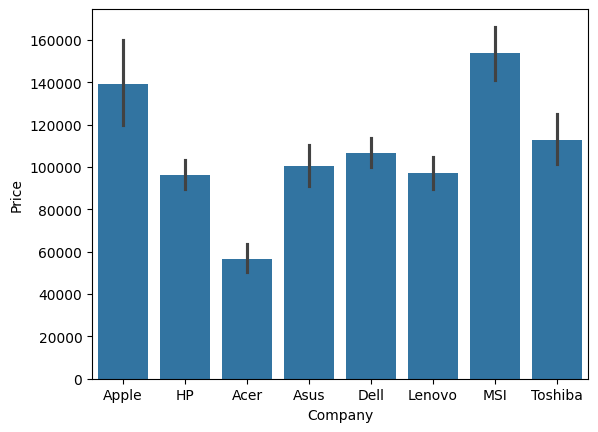

In [313]:
sns.barplot(x =df['Company'], y = df['Price'])

The graph illustrates that MSI laptops generally have the highest average price among the brands represented, while Acer tends to have the lowest.

In [314]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
415,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Linux,2.3,53248


<Axes: xlabel='TypeName'>

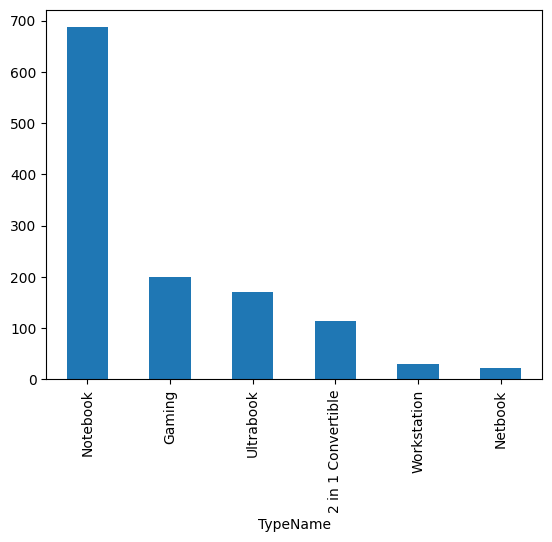

In [315]:
df["TypeName"].value_counts().plot(kind = 'bar')

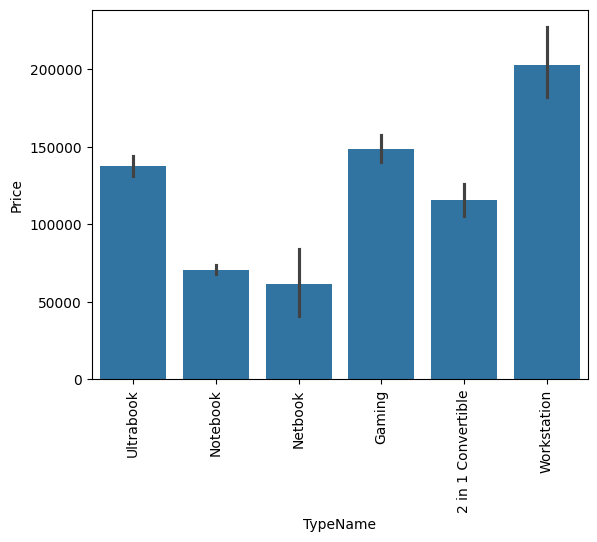

In [316]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

The bar graph illustrates the average price variation across different laptop types. "Workstation" laptops command the highest average price, indicating they are typically equipped with high-end components. "Gaming" and "Ultrabook" laptops also have relatively high average prices. In contrast, "Netbook" and "Notebook" laptops have lower average prices, suggesting they are designed for more budget-conscious users.

In [317]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [318]:
df = df[df.groupby('Inches')["Inches"].transform('count') > 10]

In [319]:
df.shape

(1198, 11)

In [320]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


<ipython-input-321-89f763ca4b2b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


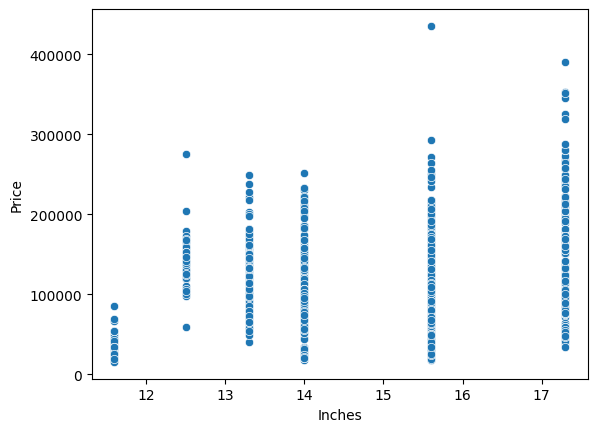

In [321]:
#Inches vs Price
sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

The scatter plot suggests a weak positive correlation between laptop screen size (in inches) and price, indicating that larger laptops tend to be slightly more expensive.

<ipython-input-322-02077d189f4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


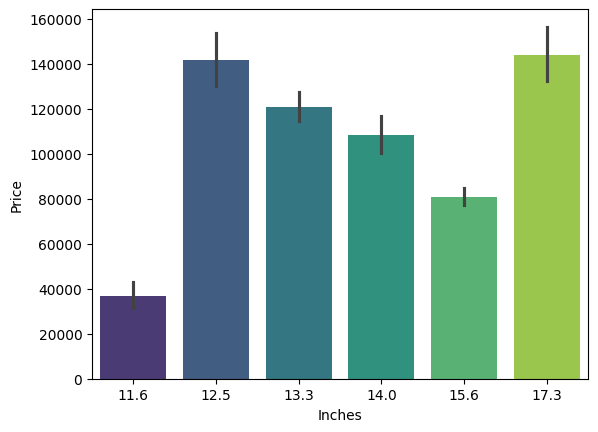

In [322]:
sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

In [323]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
900,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7Y75 1.3GHz,8,512GB SSD,Intel HD Graphics 615,Windows 10,1.24,178985


In [324]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [325]:
a = "IPS Panel Full HD / Touchscreen 1920x1080"
#X_res = 1920 , #Y_res = 1080

In [326]:
a.split()[-1]

'1920x1080'

In [327]:
a.split()[-1].split("x")

['1920', '1080']

In [328]:
a.split()[-1].split("x")[0] #X_res

'1920'

In [329]:
a.split()[-1].split("x")[1] #Y_res

'1080'

In [330]:
df["X_res"] = df['ScreenResolution'].apply((lambda x: x.split()[-1].split("x")[0])).astype('int')

In [331]:
df["Y_res"] = df['ScreenResolution'].apply((lambda x: x.split()[-1].split("x")[1])).astype('int')

In [332]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119112,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79925,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51123,1920,1080
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160358,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35564,1366,768


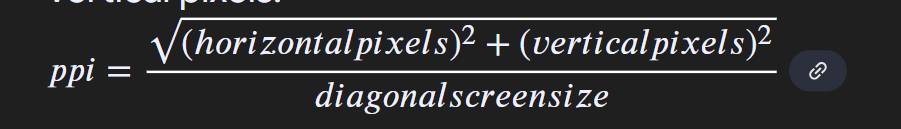



Pixels per inch (PPI) refers to the number of pixels contained within each inch of a digital image. It also refers to the set number of pixels a screen can display. Generally speaking, the higher the PPI, the better the image quality.

In [333]:
#Add a column for ppi
#X_res
#Y_res
#Inches
df['ppi'] = round(((df['X_res']**2) + (df["Y_res"]**2))**0.5/df['Inches'],2)

In [334]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119112,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79925,1440,900,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51123,1920,1080,141.21
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160358,2560,1600,226.98
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35564,1366,768,100.45


In [335]:
#ppi vs price Analysis
df['ppi'].value_counts()

,count
ppi,
141.21,419
100.45,194
127.34,131
157.35,122
165.63,100
111.94,42
135.09,28
276.05,25
176.23,25


<Axes: xlabel='ppi', ylabel='Price'>

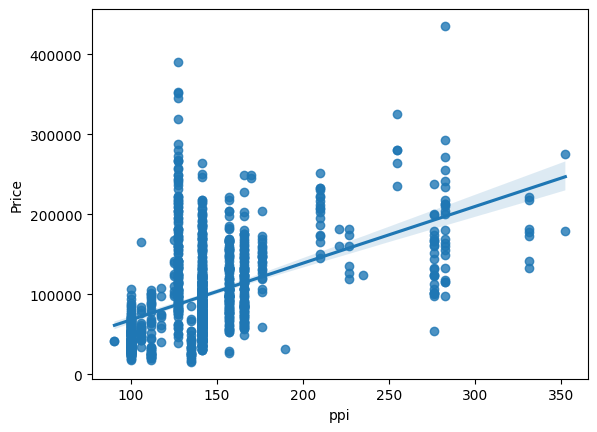

In [336]:
sns.regplot(x =df['ppi'] , y =df['Price'])

While there is some variability, the overall trend indicates that as pixel density increases, the price tends to increase as well. This suggests that higher pixel density displays are often associated with more premium laptops.

In [337]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [338]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#If there is IPS in this str return 1 else o
(lambda a: 1 if "IPS" in a else 0)(" Panel Full HD IPS / Touchscreen 1920x1080")

1

In [339]:
df['IPS'] = df['ScreenResolution'].apply(lambda a: 1 if "IPS" in a else 0)

<Axes: xlabel='IPS'>

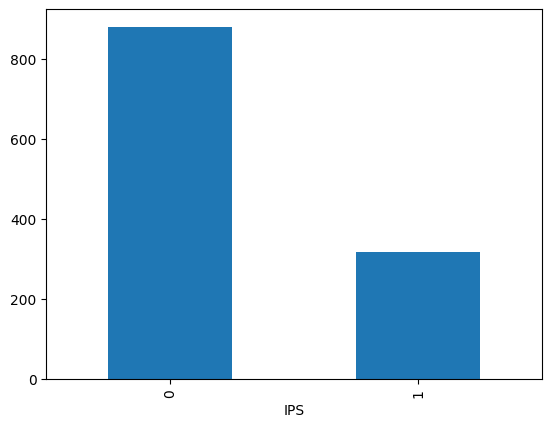

In [340]:
df['IPS'].value_counts().plot(kind ='bar')

This bar chart illustrates the distribution of laptops based on whether they have an IPS (In-Plane Switching) display or not.

0: Represents laptops without an IPS display

1: Represents laptops with an IPS display

The chart clearly shows a higher prevalence of laptops without IPS displays compared to those with IPS displays.

In [341]:
df.shape

(1198, 15)

In [342]:
(lambda a: 1 if "Touchscreen" in a else 0)("IPS Panel Full HD 1366x768")

0

In [343]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda a: 1 if "Touchscreen" in a else 0)

In [344]:
df["Touchscreen"].value_counts()

,count
Touchscreen,
0,1041
1,157


<Axes: xlabel='Touchscreen'>

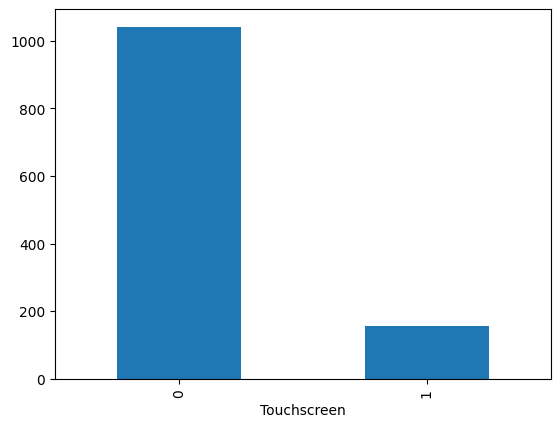

In [345]:
df['Touchscreen'].value_counts().plot(kind ='bar')

This bar chart provides a visual representation of laptop distribution based on touchscreen functionality.

0: Represents laptops without a touchscreen

1: Represents laptops equipped with a touchscreen

The chart reveals a substantial majority of laptops in the dataset lack touchscreen capabilities.

In [346]:
def pow(a,b):
  c = a**b
  return c

In [347]:
pow(2,3)

8

In [348]:
x= lambda a : a**2
x(2)

4

In [349]:
add = lambda x,y : x+y
add(2,4)

6

In [350]:
def add(a,b):
  return a+b

  add(2,4)

<Axes: xlabel='Cpu'>

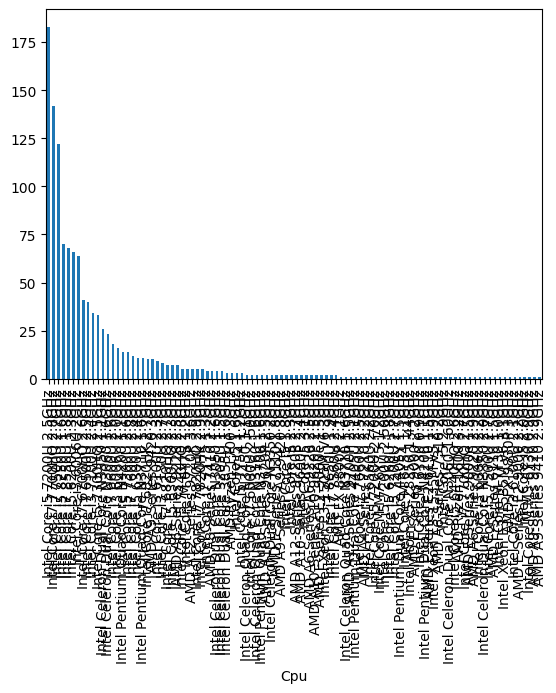

In [351]:
df["Cpu"].value_counts().plot(kind='bar')

In [352]:
df["Cpu"].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core i5 2.0GHz,1
Intel Core M M3-6Y30 0.9GHz,1


In [353]:
a = "Intel Core i5 7200U 2.5GHz"
a.split()           #to convert str into list

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [354]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [355]:
" ".join(a.split()[:3])

'Intel Core i5'

In [356]:
(lambda a :" ".join(a.split()[:3]))("AMD A9-Series 9410 2.9GHz")

'AMD A9-Series 9410'

In [357]:
df["Cpu"] = df["Cpu"].apply(lambda a :" ".join(a.split()[:3]))

In [358]:
df["Cpu"].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [359]:
#Will filter the AMD cpu w.r.t the series
#AMD A9-Series 9420 >> AMD A-Series
#AMD E-Series 9000 >>> AMD E-Series
#AMD FX 8800P  >> AMD F-Series

In [360]:
def fetch_pro(text):
  if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
    return text
  elif text.split()[0] == "Intel":
    return "Other Intel Processor"
  else:
    if text[4] == "E":
      return "AMD E-Seies"
    elif text[4] == "A":
      return "AMD A-Series"
    elif text[4] == "F":
      return "AMD F-Series"
    else:
      return "AMD Ryzen Series"




In [361]:
fetch_pro("AMD FX 9830P")

'AMD F-Series'

In [362]:
df["Cpu"] = df["Cpu"].apply(fetch_pro)

<Axes: xlabel='Cpu'>

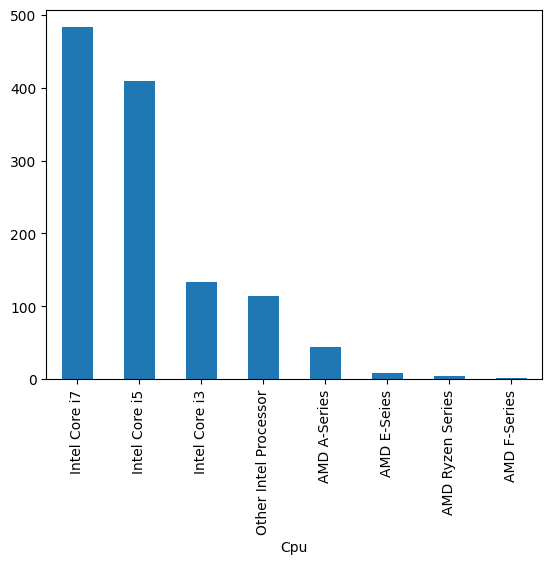

In [363]:
df["Cpu"].value_counts().plot(kind='bar')

The graph shows that Intel Core i7 processors are the most common type, followed by Intel Core i5, with Intel Core i3 and other Intel processors also being relatively common. AMD processors, including Ryzen, A-Series, E-Series, and F-Series, are less common compared to Intel processors.

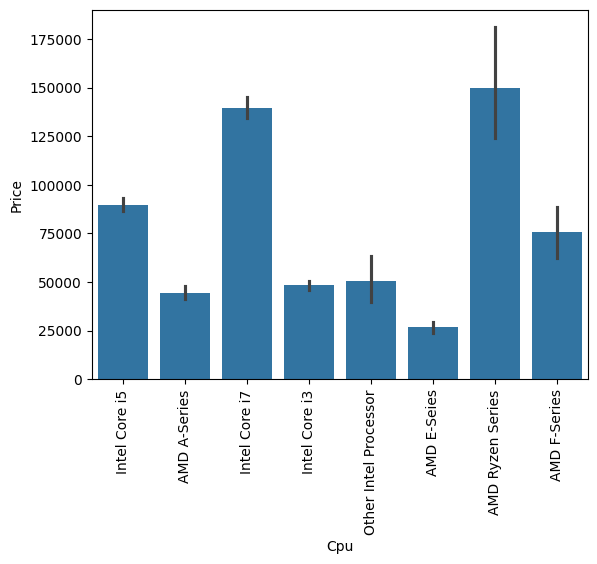

In [364]:
sns.barplot(x = df["Cpu"], y = df["Price"])
plt.xticks(rotation = 90)
plt.show()

The bar graph reveals price variations across different laptop CPUs. Laptops with AMD Ryzen Series processors command the highest average price, suggesting they are typically equipped with high-end components. Intel Core i7 and i5 laptops also have relatively high average prices. In contrast, laptops with AMD A-Series and E-Series processors have lower average prices, indicating they are likely designed for more budget-conscious users.

In [365]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS,Touchscreen
1115,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,122607,1920,1080,165.63,0,0
769,Acer,Notebook,15.6,1366x768,Other Intel Processor,4,1TB HDD,Intel HD Graphics 505,Linux,2.10,26495,1366,768,100.45,0,0
388,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.00,189823,1920,1080,141.21,1,0


In [366]:
a = ("Intel HD Graphics 500")
a.split()

['Intel', 'HD', 'Graphics', '500']

In [367]:
a.split()[:2]

['Intel', 'HD']

In [368]:
" ".join(a.split()[:2])

'Intel HD'

In [369]:
(lambda a : " ".join(a.split()[:2]))("Intel HD Graphics 500")

'Intel HD'

In [370]:
df["Gpu"] = df["Gpu"].apply((lambda a : " ".join(a.split()[:2])))

In [371]:
df["Gpu"].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


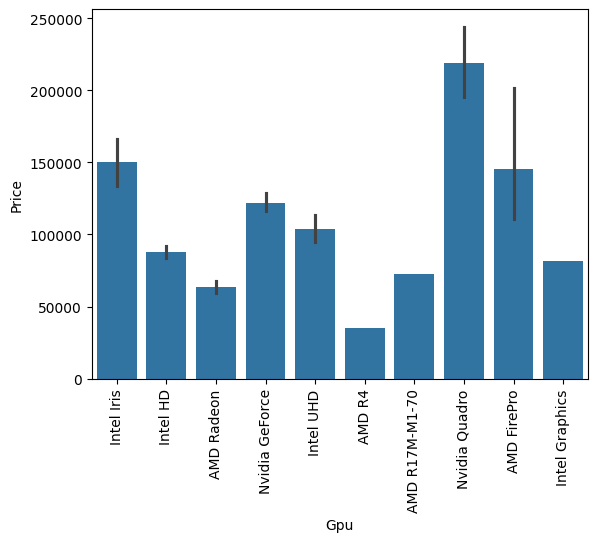

In [372]:
sns.barplot(x = df["Gpu"], y = df["Price"])
plt.xticks(rotation = 90)
plt.show()

The graph reveals that laptops with Nvidia Quadro GPUs have the highest average price, followed by those with Nvidia GeForce and AMD R17M-M1-70 GPUs. Laptops with Intel Iris, Intel HD, and AMD Radeon GPUs tend to have lower average prices.

In [373]:
df["OpSys"].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [374]:
def os(text):
  if text == "Windows 10" or text == "Windows 10 S":
    return "Windows 10"
  elif text == "Windows 7":
    return "Windows 7"
  elif text == "macOS" or text == "Mac OS X":
    return "mac OS"
  elif text == "No OS":
    return "No OS"
  elif text == "Linux":
    return "Linux"
  else:
    return "Chrome OS"

In [375]:
os("Windows 10 S")

'Windows 10'

In [376]:
df["OpSys"] = df["OpSys"].apply(os)

In [377]:
df["OpSys"].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
mac OS,11


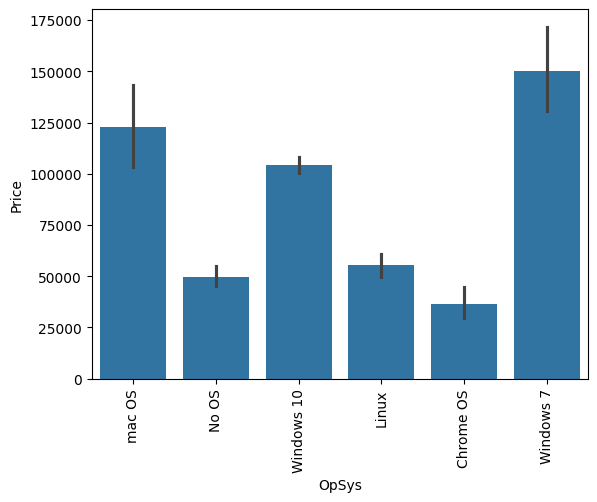

In [378]:
sns.barplot(x = df["OpSys"], y = df["Price"])
plt.xticks(rotation = 90)
plt.show()

In [379]:
df[df["OpSys"] == "Windows 10"]["Price"].describe()

,Price
count,999.000000
mean,104112.825826
std,58518.874734
min,17062.000000
25%,60014.000000
50%,92377.000000
75%,133320.500000
max,435570.000000


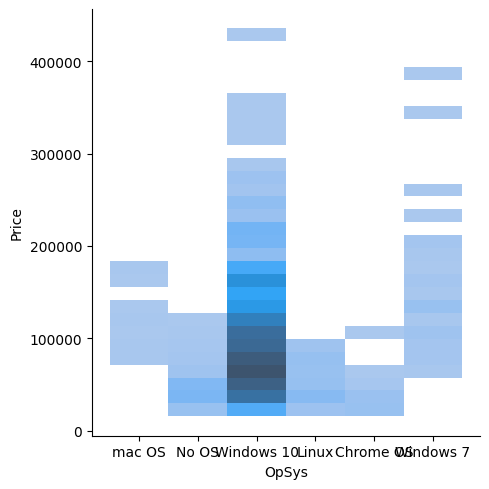

In [380]:
sns.displot(data = df , x = "OpSys", y = "Price")

In [381]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS,Touchscreen
149,Acer,Notebook,15.6,1366x768,Intel Core i3,4,1TB HDD,Intel HD,Windows 10,2.10,39743,1366,768,100.45,0,0
64,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD,Windows 10,1.86,61348,1920,1080,141.21,0,0
515,Asus,Netbook,11.6,1366x768,Other Intel Processor,2,32GB Flash Storage,Intel HD,Windows 10,1.10,21783,1366,768,135.09,0,0


In [382]:
df["Memory"].value_counts()
#Flash storage
#SSD
#HDD
#Hybrid

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


In [383]:
new = df['Memory'].str.split("+", n=1 , expand=True)
df["first"] = new[0]
df["first"] = df["first"].str.strip()
df["second"] = new[1]

df["Layer1HDD"] =df["first"].apply(lambda x:1 if "HDD" in x else 0)
df["Layer1SSD"]= df['first'].apply(lambda x:1 if "SSD" in x else 0)
df["Layer1Hybrid"]= df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer1FlashStorage"]= df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0", inplace=True)

df['second'] = df['second'].str.strip()
df["Layer2HDD"] =df["second"].apply(lambda x:1 if "HDD" in x else 0)
df["Layer2SSD"]= df['second'].apply(lambda x:1 if "SSD" in x else 0)
df["Layer2Hybrid"]= df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer2FlashStorage"]= df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1FlashStorage']+df['second']*df['Layer2FlashStorage']

df.drop(columns=['first','second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1FlashStorage', 'Layer2HDD',
                 'Layer2SSD', 'Layer2Hybrid', 'Layer2FlashStorage'],inplace=True)

<ipython-input-383-1adc24cf2dee>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0", inplace=True)


In [384]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
914,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3,4,1TB HDD,Intel HD,Windows 10,2.40,44366,1920,1080,141.21,0,0,1,0,0,0
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5,8,256GB SSD,Nvidia GeForce,Windows 10,2.50,73706,1920,1080,141.21,1,0,0,256,0,0
512,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,1TB HDD,Intel HD,Windows 10,2.18,74329,1920,1080,141.21,0,0,1,0,0,0


In [385]:
df.to_csv("Cleaned_data.csv")